#### Обработка данных

In [1]:
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go

from scipy import optimize as opt 
import scipy
import scipy.odr as odr

from statsmodels.stats.weightstats import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data1 = pd.read_csv('data/experiment1.csv') # Считываем данные
data2 = pd.read_csv('data/experiment2.csv')

In [3]:
data1.head # Посмотрим на несколько значений

<bound method DataFrame.head of     ﻿D    D1    1m  2m  3m
0   40   1.0  70.0  70  70
1   45   2.5  19.0  38  58
2   50   3.5  11.0  22  34
3   55   4.0   7.5  16  24
4   60   5.5   6.0  12  18
5   65   9.0   5.0   9  14
6   70  10.0   4.0   8  11
7   75  12.0   3.0   6   9
8   80  13.0   2.0   5   7
9   85  14.5   2.0   5   6
10  90  16.5   1.0   3   5>

In [4]:
data2.head

<bound method DataFrame.head of    ﻿number   x1   x2   x3   x4   x5    Y  K
0        3  1.5  1.4  1.4  0.0  0.0  3.5  4
1        5  1.8  1.9  1.7  1.9  1.5  5.3  4
2        6  1.7  1.8  1.6  1.7  0.0  3.3  4
3       10  1.0  0.9  1.0  0.8  0.0  2.0  4
4       11  0.7  0.8  0.6  0.7  0.0  1.3  4
5       12  0.7  0.8  0.6  0.7  0.0  1.0  4>

In [5]:
data1['﻿D'] = (data1['﻿D']-38)*10 #mkm

In [6]:
data_Dl = data1['D1']*4.3/120
data_D1_errors = (3/43.0 + 1/120.0 + 1/data1['D1'])*data_Dl

In [7]:
mx_1 = 5461*1.24*2.0/10**10/data1['1m']
mx_2 = 5461*1.24*2.0*2/10**10/data1['2m']
mx_3 = 5461*1.24*2.0*3/10**10/data1['3m']

mean_m = (mx_1+mx_2+mx_3)/3.0
disp_m = np.sqrt((mx_1 - mean_m)**2 + (mx_2 - mean_m)**2 + (mx_3 - mean_m)**2)/np.sqrt(0.5)

In [8]:
mean_m/data1['﻿D']

0     1.934754e-09
1     1.012439e-09
2     1.015947e-09
3     1.017959e-09
4     1.026006e-09
5     1.064248e-09
6     1.090131e-09
7     1.220115e-09
8     1.428033e-09
9     1.344723e-09
10    1.967827e-09
dtype: float64

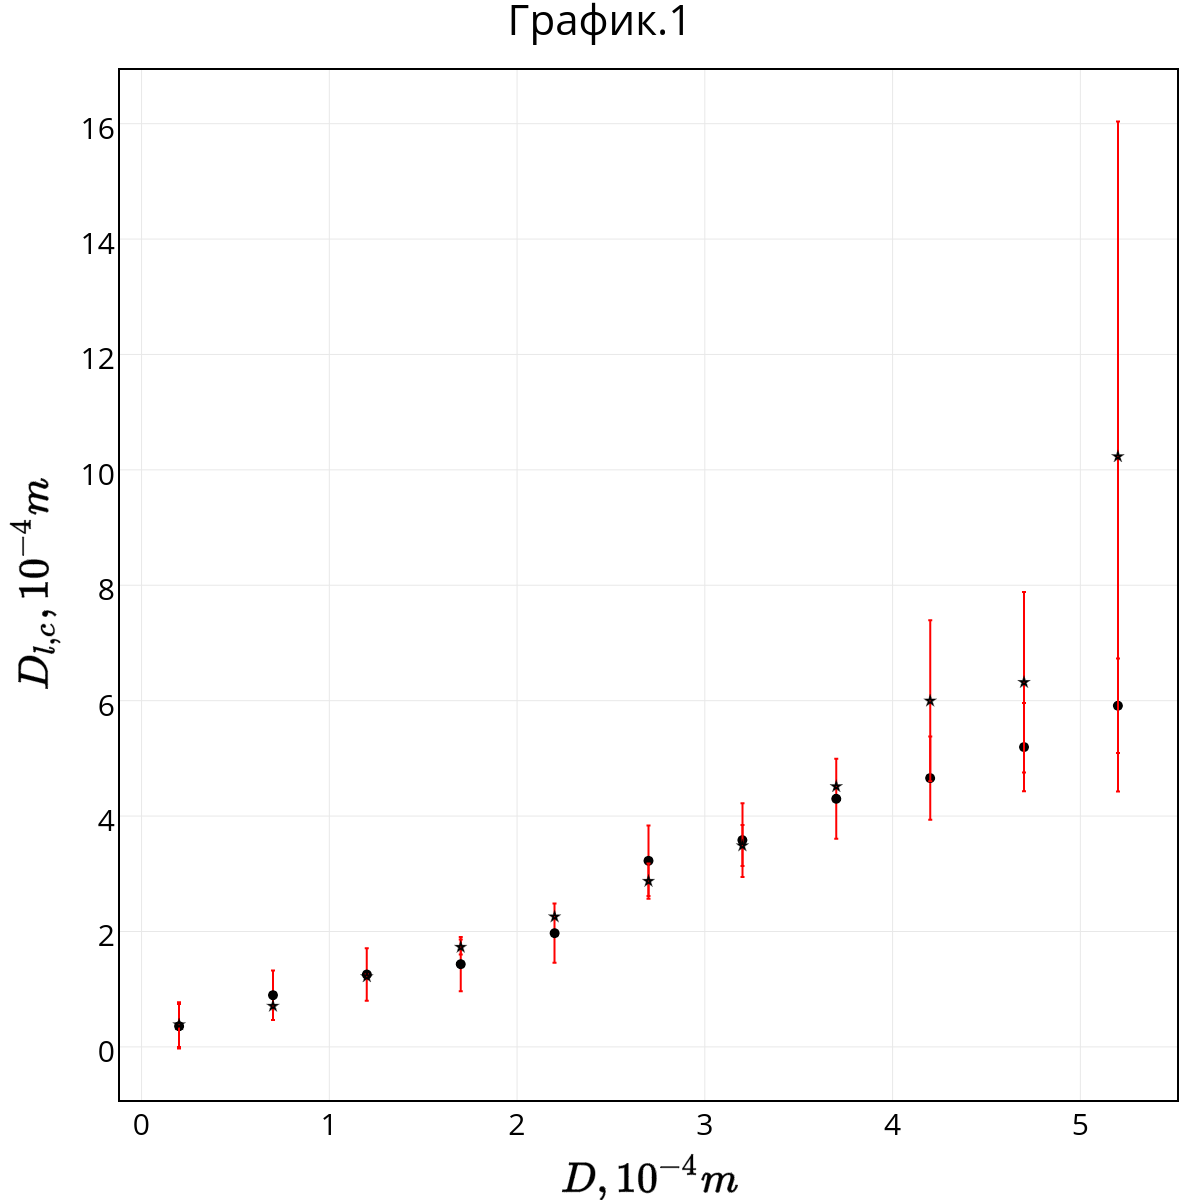

In [9]:
trace1 = go.Scatter(
    x = data1['﻿D']/100,
    y = data_Dl*10,
    mode = 'markers',
    name = '$D_l$',
    error_y = dict(
        type = 'data',
        array = data_D1_errors*10,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
)

trace2 = go.Scatter(
    x = data1['﻿D']/100,
    y = mean_m*10**7,
    mode = 'markers',
    name = '$D_c$',
    error_y = dict(
        type = 'data',
        array = disp_m*10**7,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000',
        symbol = 'star-dot'
    ),
)

trace0 = [trace1, trace2]

layout = go.Layout(
    showlegend=False,
    legend=dict(
        #x=0.9,
        #y=1
        orientation= "h"
    ),
    title = "График.1",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$D, 10^{-4} m$',
        #range = [0.0, 1.5],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$D_{l, c}, 10^{-4} m$',
        #range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

In [10]:
data2['x1'] = data2['x1']*0.01
data2['x2'] = data2['x2']*0.01
data2['x3'] = data2['x3']*0.01

In [11]:
dc_1 = 5461*10**(-10)*1.24/data2['x1']
dc_2 = 5461*10**(-10)*1.24/data2['x2']
dc_3 = 5461*10**(-10)*1.24/data2['x3']
dc_4 = 5461*10**(-10)*1.24/data2['x4']
dc_5 = 5461*10**(-10)*1.24/data2['x5']

In [12]:
mean_dc = (dc_1+dc_2+dc_3)/3.0
disp_dc = np.sqrt((dc_1 - mean_dc)**2 + (dc_2 - mean_dc)**2 + (dc_3 - mean_dc)**2)/np.sqrt(0.5)

In [13]:
data2['Y'] = data2['Y']*0.01

In [14]:
dy = data2['Y']/data2['K']/(108.0/12.0)
dy_error = (0.001/data2['Y'] + 1/12.0 + 1/108.0)*dy

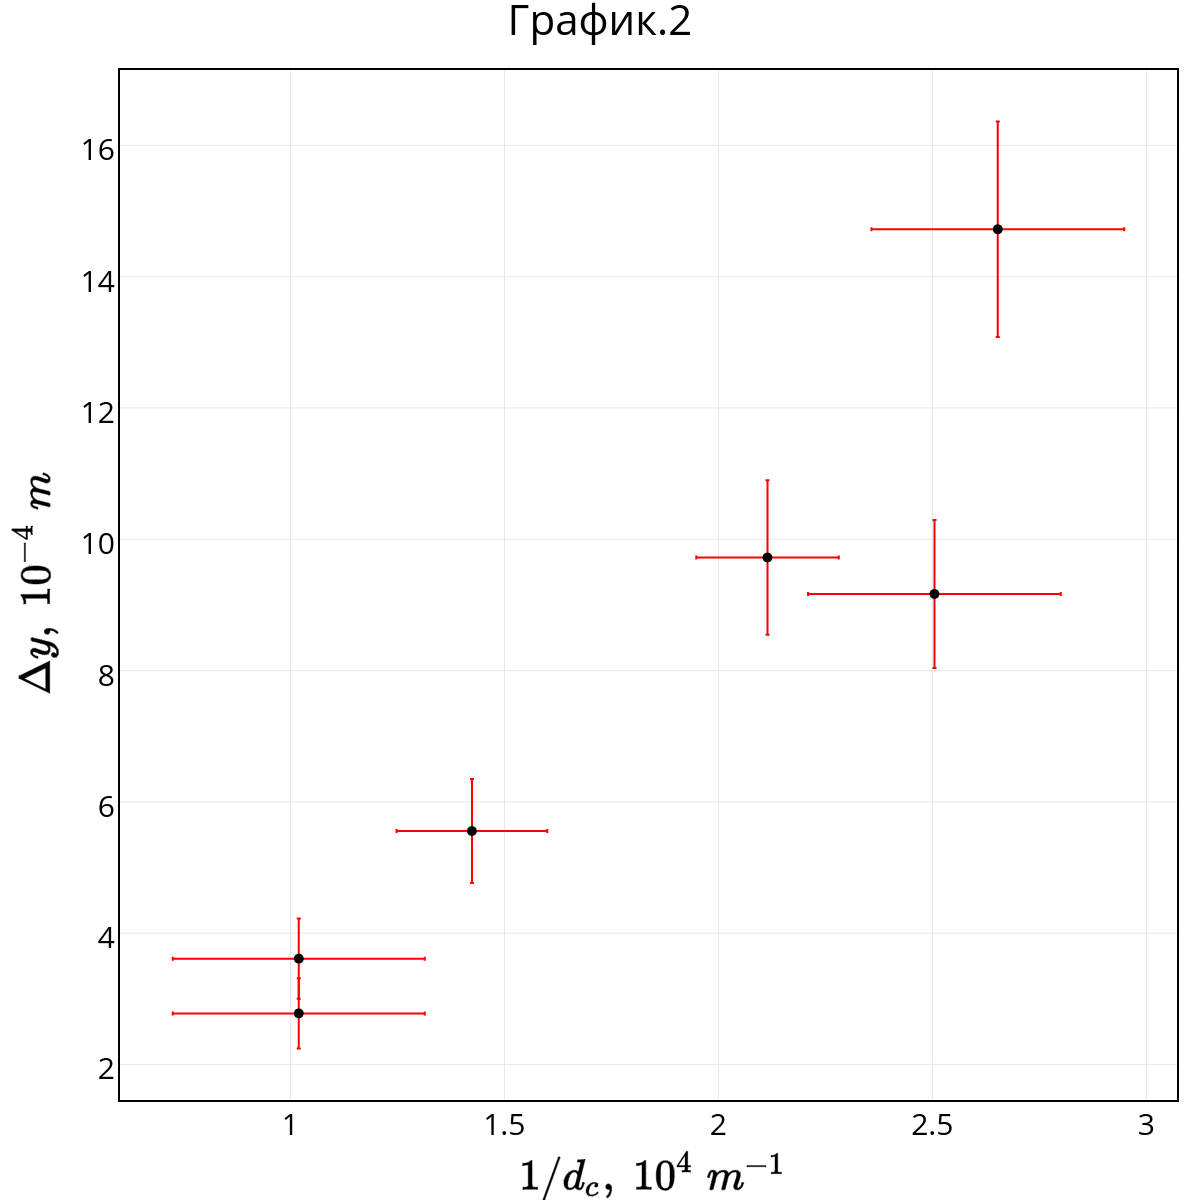

In [15]:
trace1 = go.Scatter(
    x = 1/mean_dc / 10000,
    y = dy*10000,
    mode = 'markers',
    name = '$D_l$',
    error_y = dict(
        type = 'data',
        array = dy_error*10000,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array = 1/mean_dc * disp_dc/mean_dc / 10000,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
)

trace0 = [trace1]

layout = go.Layout(
    showlegend=False,
    legend=dict(
        #x=0.9,
        #y=1
        orientation= "h"
    ),
    title = "График.2",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$1/d_c,~10^{4}~m^{-1}$',
        #range = [0.0, 1.5],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$Δy,~10^{-4}~m$',
        #range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)